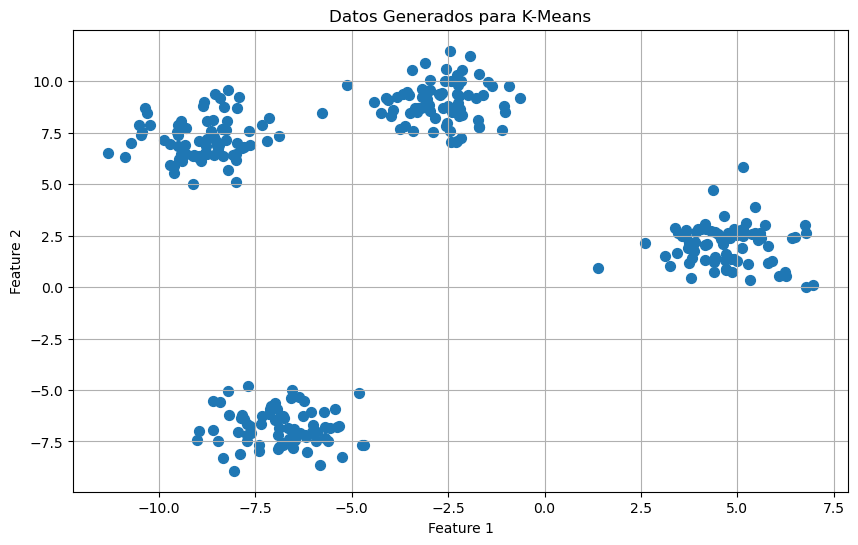

C:\Users\Soportedrai\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


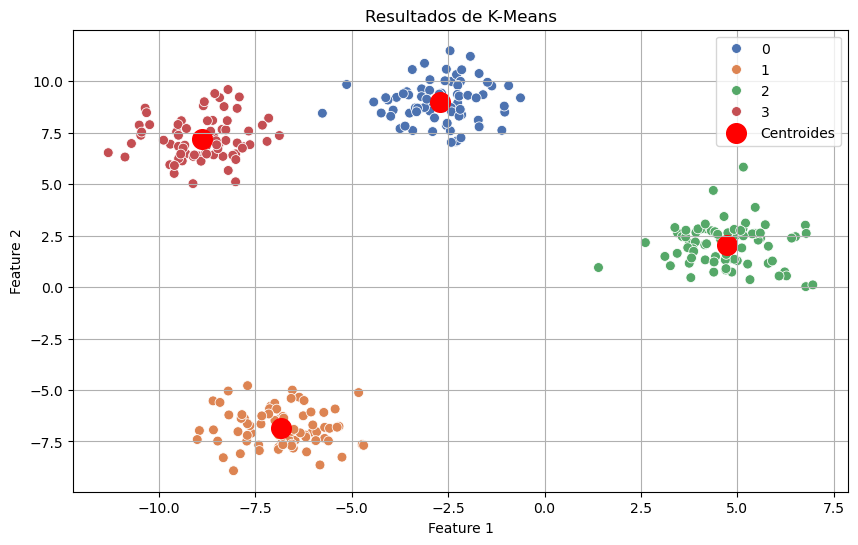

Centroides de los clusters:
[[-2.70981136  8.97143336]
 [-6.83235205 -6.83045748]
 [ 4.7182049   2.04179676]
 [-8.87357218  7.17458342]]
Inercia: 564.9141808210252


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# Generar datos de ejemplo
n_samples = 300
n_features = 2
n_clusters = 4
X, y = make_blobs(n_samples=n_samples, centers=n_clusters, n_features=n_features, random_state=42)

# Visualizar los datos generados
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], s=50)
plt.title('Datos Generados para K-Means')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True)
plt.show()

# Aplicar K-Means
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(X)

# Predecir etiquetas
y_kmeans = kmeans.predict(X)

# Visualizar los resultados
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y_kmeans, palette='deep', legend='full', s=50)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, color='red', label='Centroides')
plt.title('Resultados de K-Means')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()

# Imprimir las posiciones de los centroides
print("Centroides de los clusters:")
print(kmeans.cluster_centers_)

# Imprimir la inercia
print(f'Inercia: {kmeans.inertia_}')


# Pasos del ciclo de vida:

1. Carga de datos
2. Ingenieríaa de características
3. Escalado de caracterísicas
4. Búsquedad de optimización de parámetros
5. Entrenamiento K- Means
6. Análisis y visualización
7. Guardado del modelo
8. Predicción



In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn. preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
#Guardado de modelo:
import joblib
from datetime import datetime
import datasets

In [3]:
data = pd.read_excel('./datasets/BD_Clientes_Productos.xlsx')
df = pd.DataFrame(data)
df.info

<bound method DataFrame.info of             Fecha                               Nombre Cliente  \
0      2018-01-04            OCEANO AZUL DISTRIBUCIONES S.A.S.   
1      2018-01-04  COMPAÑIA NACIONAL DE LEVADURAS LEVAPAN S.A.   
2      2018-01-04                     RESTAURANTE JIANBANQ MEI   
3      2018-01-04           COMERCIALIZADORA Y ASOCIADOS S.A.S   
4      2018-01-04                               RAPI MERCAR SA   
...           ...                                          ...   
299164 2022-12-28               MINIMERCADO EL PARAISO RENGIFO   
299165 2022-12-28                    PRONTO DISTRIBUCIONES SAS   
299166 2022-12-28                     INVERSIONES SUPERVAQUITA   
299167 2022-12-28             COMERCIALIZADORA LA POSADA S.A.S   
299168 2022-12-28                     OURO FINO COLOMBIA S.A.S   

           Tipo Cliente Departamento               Vendedor Sucursal  \
0          DISTRIBUIDOR    ATLANTICO  SILVIA CAROLINA LOPEZ    NORTE   
1       CADENA REGIONAL    ANTI

In [4]:
df.head()


,Fecha,Nombre Cliente,Tipo Cliente,Departamento,Vendedor,Sucursal,Categoría,Producto,Linea,Cantidad,Venta,Costos
0,2018-01-04,OCEANO AZUL DISTRIBUCIONES S.A.S.,DISTRIBUIDOR,ATLANTICO,SILVIA CAROLINA LOPEZ,NORTE,LACTEA,CHEDDAR,QUESOS,5,45107,41250
1,2018-01-04,COMPAÑIA NACIONAL DE LEVADURAS LEVAPAN S.A.,CADENA REGIONAL,ANTIOQUIA,PAULA ANDREA ARTEAGA,CENTRO,LACTEA,MANTEQUILLA MINI,ESPARCIBLES,1,5717,3713
2,2018-01-04,RESTAURANTE JIANBANQ MEI,CADENA REGIONAL,ANTIOQUIA,PAULA ANDREA ARTEAGA,CENTRO,LACTEA,MANTEQUILLA MINI,ESPARCIBLES,1,5717,3713
3,2018-01-04,COMERCIALIZADORA Y ASOCIADOS S.A.S,CADENA REGIONAL,ANTIOQUIA,VICKY BUENAVENTURA,CENTRO,LACTEA,AREQUIPE MINI,POSTRES Y DULCES,1,8183,4538
4,2018-01-04,RAPI MERCAR SA,CADENA REGIONAL,ANTIOQUIA,LINA CECILIA CARDONA,CENTRO,LACTEA,MIGUELUCHO PER,POSTRES Y DULCES,1,8756,5041


In [5]:
# Cambiar el formato de fecha:

df['Fecha'] = pd.to_datetime(df['Fecha'],format='%d/%m/%Y')
df.head()                                                    

,Fecha,Nombre Cliente,Tipo Cliente,Departamento,Vendedor,Sucursal,Categoría,Producto,Linea,Cantidad,Venta,Costos
0,2018-01-04,OCEANO AZUL DISTRIBUCIONES S.A.S.,DISTRIBUIDOR,ATLANTICO,SILVIA CAROLINA LOPEZ,NORTE,LACTEA,CHEDDAR,QUESOS,5,45107,41250
1,2018-01-04,COMPAÑIA NACIONAL DE LEVADURAS LEVAPAN S.A.,CADENA REGIONAL,ANTIOQUIA,PAULA ANDREA ARTEAGA,CENTRO,LACTEA,MANTEQUILLA MINI,ESPARCIBLES,1,5717,3713
2,2018-01-04,RESTAURANTE JIANBANQ MEI,CADENA REGIONAL,ANTIOQUIA,PAULA ANDREA ARTEAGA,CENTRO,LACTEA,MANTEQUILLA MINI,ESPARCIBLES,1,5717,3713
3,2018-01-04,COMERCIALIZADORA Y ASOCIADOS S.A.S,CADENA REGIONAL,ANTIOQUIA,VICKY BUENAVENTURA,CENTRO,LACTEA,AREQUIPE MINI,POSTRES Y DULCES,1,8183,4538
4,2018-01-04,RAPI MERCAR SA,CADENA REGIONAL,ANTIOQUIA,LINA CECILIA CARDONA,CENTRO,LACTEA,MIGUELUCHO PER,POSTRES Y DULCES,1,8756,5041


In [7]:
snapshot_date = df['Fecha'].max() + pd.Timedelta(days=1)

#Agrupaciones por clientes:

rfm_data = df.groupby('Nombre Cliente').agg({
    'Fecha': lambda date: (snapshot_date - date.max()).days, 
    'Nombre Cliente':'count',   
    ' Venta': 'sum'            
})

display(rfm_data)

TypeError: unsupported operand type(s) for +: 'int' and 'str'

In [ ]:
# Renombramos las columnas

rfm_data.rename(columns = {
    'Fecha' : 'Recencia',
    'Nombre Cliente': 'Frecuencia',
    'Venta' : 'Monetario'
}, inplace = True)


display(rfm_data)

In [ ]:
# Escalada de caracteristicas

scaler = StandardScaler()
rfm_scaler = scaler.fit_transform(rfm_data)

rfm_scaler_df = pd.DataFrame(rfm_scaler,index = rfm_data.index,columns = rfm_data.columns)
display(rfm_scaler_df)



### Método codo (WCSS)


In [ ]:
# Buscar el valor optimo de clusters:
wcs = {}
for k in range(2,len(rfm_scaler_df.index)):
    kmeans =  KMeans(n_clusters = k,  random_state = 42, n_init = 10, max_iter = 300)
    kmeans.fit(rfm_scaler_df)
    wcss[k] = kmeans.inertia_

print(wcss.keys())




In [ ]:
# Gráfica de codo:
plt.figure(figsize(10,6))
plt.plot(list(wcss.keys()),list(wcss.values()), 'o-')
plt.title('Gráfica de codo para encontrar el k óptimo')
plt.xlabel('Cantidad de clusters (K)')
plt.ylabel('WCSS - Inercia')
pl.grid(True)

plt.show

### Método de Silueta:



In [ ]:
silhoutte_scores = {}

for k in range(2,len(rfm_scaler_df.index)):
    kmeans = KMeans(n_clusters = k, init = 'k-means++', n_init = 10, random_state = 42)
    kmeans.fit(rfm_scaler_df)
    score = silhoutte_scores(rfm_scaler_df, kmeans.labels_0)
    silhoutte_scores[k] = score
    print(f'Coeficiente de silueta para  [k] = {score:.4f}')
    

In [ ]:
K_OPTIMO = 3
#Entrenamiento final y generación del modelo k-means:
kmeans_final = KMeans(
    n_clusters =3,        #numero de clusters
    init='k-means++',     # Inicialización inteligente de centroides
    n_init=10,            #Número de inicializaciones
    random_state=42)      #Semilla para reproducibilidad

kmeans_final.fit(rfm_scaler_df)

#asignar la etiqueta del cluster a cada cliente:

rfm_data['Cluster'] = kmeans_final.labels_
print(f'Datos RFM con segmentos asignado: ')
display(rfm_data)



In [8]:
# Visualización de los segmentos:

Cluster_analisis = rfm_data.groupby('Cluster').agg({
    'Recencia' : 'mean',
    'Frecuencia':'mean',
    'Monetario':['mean','ccount']
}).round(2)

print()

NameError: name 'rfm_data' is not defined

In [ ]:
# Figura de clusters:
#Creamos una figura con un tamaño especifico (12x9 pulgadas)
fig = plt.figure(figsize(12,9))
ax = fig.add_subplot(111

In [9]:
# Guardado del modelo:

model_filename = './Modelo/best_kmeans_model.joblib'
scaler_filename = './Modelo/scaler.joblib'

joblib.dump(kmeans_final,model_filename)
joblib.dump(scaler, scaler_filename)

print(f'Modelo guardado en {model_filename},scaler guardado en {scaler_filename}')


NameError: name 'kmeans_final' is not defined

In [ ]:
model_filename = './Modelo/best_kmeans_model.joblib'
scaler_filename = './Modelo/scaler.joblib

def predecir_segmento(datos_cliente):
    try:
        model = joblib.load(model_filename)
        scaler_model = joblib.load(scaler_filename)


        #Escalar los datos del cliente nuevo:

        datos_escalados = scaler_model.transform(datos_cliente)

        #Predicción:
        prediccion = model.predict(datos_escalados)
        return prediccion[0]

    except Except as e:
        print(f'Se ha presentado fallas en la predicción revise el error:\n{e}')




In [ ]:
data_test = {
    'Reciencia' : [2],           # Compro hace 2 días
    'Frecuencia' : [10],         # Ha realizado 10 compras
    'MOnetario': [100000]        # Ha gastado $1.000.0000
}

data_df = pd.DataFrame(data_test)
    

In [ ]:
# Predecir su segmento

segmento_predicho = predecir_segmento(data_df)

if segmento_predicho is not None:
    print(f"---Prueba de la Función de Predicción---")
    print(f"Datos del nuevo cliente:\n{data_df}")
    print(f"\nEl cliente pertenece al segmento: {segmento_predicho}")
    
    